In [1]:
# colnames(df)

## Przygotowanie danych


### Wczytanie danych csv 

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.1  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
txt <- read_file('spec-wyniki.csv')
txt <- gsub("\"", "", gsub("\",\"", "|", txt))


df <- read_delim(txt, delim="|", skip=1,
                 col_names=c("Data",
                             "Metodyka",
                             "Dl_projektu",
                             "Udzial_testerow",
                             "Skojarzenia_spec",
                             "Spisanie_wymagan",
                             "Os_odpowiedzialna",
                             "L_stron",
                             "Waznosc_spec",
                             "Cechy_spec",
                             "Wady_spec",
                             "Uwagi"
                             ))
#                             ),
#                  col_types=cols(
#                      Data=col_datetime(format="%Y/%m/%d %I:%M:%S %p %Z"),
#                      Dl_projektu=col_factor(levels=c('do pół roku', '0,5 - 1 roku', '1-3 lata', 'powyżej 3 lat'))))

### Normalizacja typu i wartości zmiennych

#### Data

In [4]:
df$Data <- parse_datetime(df$Data, format="%Y/%m/%d %I:%M:%S %p %Z")

#### Metodyka

In [5]:
# count(df, Metodyka)

df <- df %>%
    mutate(Metodyka_norm = case_when(
        Metodyka == "agile’owej" | Metodyka == "scrum" | Metodyka == "kanban" |
            Metodyka == "ni to agile ni to waterfall, ale bliżej mu do iteracyjnego podejścia" | 
            grepl("scrum.*but", df$Metodyka) ~ "Iteracyjne",
        Metodyka == "watefallowej" | Metodyka == "watefallowej;Waterfall, który udaje agile" | 
            Metodyka == "V" ~ "Sekwencyjne",
        grepl("agile’owej;watefallowej", df$Metodyka) ~ "Iteracyjne i sekwencyjne",
        TRUE ~ "Inne"
    ))


df$Metodyka_norm <- parse_factor(df$Metodyka_norm)

# class(df$Metodyka_norm)
# df$Metodyka_norm


# count(df, Metodyka_norm)

[1] "factor"

[1] Iteracyjne i sekwencyjne Iteracyjne               Iteracyjne              
 [4] Iteracyjne i sekwencyjne Iteracyjne i sekwencyjne Iteracyjne              
 [7] Iteracyjne               Sekwencyjne              Iteracyjne i sekwencyjne
[10] Iteracyjne               Iteracyjne               Iteracyjne              
[13] Iteracyjne               Iteracyjne               Iteracyjne              
[16] Iteracyjne               Iteracyjne               Iteracyjne              
[19] Iteracyjne               Iteracyjne               Iteracyjne              
[22] Sekwencyjne              Iteracyjne i sekwencyjne Sekwencyjne             
[25] Iteracyjne               Inne                     Iteracyjne i sekwencyjne
[28] Sekwencyjne              Iteracyjne               Iteracyjne              
[31] Iteracyjne               Iteracyjne               Iteracyjne              
[34] Iteracyjne               Iteracyjne               Iteracyjne              
[37] Iteracyjne i sekwencyjne Iteracyjne               Iteracyjne              
[40] Sekwencyjne              Iteracyjne               Iteracyjne              
[43] Iteracyjne               Iteracyjne               Iteracyjne              
[46] Iteracyjne i sekwencyjne Iteracyjne               Iteracyjne              
[49] Iteracyjne               Iteracyjne i sekwencyjne Iteracyjne              
[52] Iteracyjne               Sekwencyjne              Iteracyjne              
[55] Iteracyjne i sekwencyjne Iteracyjne               Iteracyjne i sekwencyjne
[58] Iteracyjne               Sekwencyjne              Iteracyjne              
[61] Iteracyjne               Iteracyjne               Iteracyjne              
[64] Iteracyjne i sekwencyjne Iteracyjne               Iteracyjne i sekwencyjne
[67] Iteracyjne               Iteracyjne               Iteracyjne              
[70] Iteracyjne               Iteracyjne               Iteracyjne              
[73] Inne                    
Levels: Iteracyjne i sekwencyjne Iteracyjne Sekwencyjne Inne

Metodyka_norm,n
Iteracyjne i sekwencyjne,13
Iteracyjne,51
Sekwencyjne,7
Inne,2


#### Długość projektu

In [6]:
# df <- df %>%
#     mutate(Dl_projektu_num = case_when(
#         Dl_projektu == 'do pół roku'  ~ 1,
#         Dl_projektu == '0,5 - 1 roku' ~ 2,
#         Dl_projektu == '1-3 lata' ~ 3,
#         TRUE ~ 4
#     ))


#alternatywnie tak można zmienić typ danych
project_length_levels <- c('do pół roku', '0,5 - 1 roku', '1-3 lata', 'powyżej 3 lat')
df$Dl_projektu <- parse_factor(df$Dl_projektu, levels = project_length_levels)

#### Udział testerów

In [7]:
# df$Udzial_testerow <- gsub("tak, brali udział w definiowaniu wymagań", 
#                              "pełny", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("tak, recenzowali gotową specyfikację i mogli wnosić swoje uwagi", 
#                              "recenzja", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("tak, mieli wgląd do specyfikacji już na samym początku i na jej podstawie mogli stworzyć strategię i plan testów, ale nie mieli wpływu na zmianę samego dokumentu", 
#                              "wgląd przed testami", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("nie, mieli dostęp do specyfikacji, gdy oprogramowanie było w trakcie implementacji, albo nawet po jej zakończeniu", 
#                              "wgląd w czasie testów", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("nie i nie mieli dostępu do specyfikacji", 
#                              "brak dostępu", 
#                              df$Udzial_testerow)
# df$Udzial_testerow <- gsub("nie, bo nie było specyfikacji", 
#                              "brak specyfikacji", 
#                              df$Udzial_testerow)

df <- df %>% mutate(Udzial_testerow_norm = case_when(
    Udzial_testerow == "tak, brali udział w definiowaniu wymagań"
        ~ "pełny",
    Udzial_testerow == "tak, recenzowali gotową specyfikację i mogli wnosić swoje uwagi" 
        ~ "recenzja",
    Udzial_testerow == "tak, mieli wgląd do specyfikacji już na samym początku i na jej podstawie mogli stworzyć strategię i plan testów, ale nie mieli wpływu na zmianę samego dokumentu" 
        ~ "wgląd przed testami",
    Udzial_testerow == "nie, mieli dostęp do specyfikacji, gdy oprogramowanie było w trakcie implementacji, albo nawet po jej zakończeniu" 
        ~ "wgląd w czasie testów",
    Udzial_testerow == "nie i nie mieli dostępu do specyfikacji" 
        ~ "brak dostępu", 
    Udzial_testerow == "nie, bo nie było specyfikacji" 
        ~ "brak specyfikacji",
    Udzial_testerow == "Coś między dwa a trzy - nie tyle do recenzji, ile był dostęp dość szybko i uwagi, które się nasunęły w czasie projektowania strategii i planów były brane pod uwagę."
        ~ "recenzja",
    Udzial_testerow == "gdy się zainteresowali, to mogli na cośwplynąć" 
        ~ "recenzja",
    Udzial_testerow == "specyfikacja częściowo dostępna na początku, zmienna i głównie rozszerzana w trakcie trwania projektu" 
        ~ "wgląd przed testami",
    Udzial_testerow == "wgląd od początku, ale bez wpływu na zmiany; natomiast klient zmiany wprowadzał cały czas, także już po oddaniu projektu!! " 
        ~ "wgląd przed testami",
    Udzial_testerow == "nie brali udziału w fazie projektowania wymagań, ale mieli pełny dostęp do specyfikacji w czasie testów"
        ~ "wgląd w czasie testów",
    TRUE ~ "inne"
    ))

testers_contribution_levels <- c("pełny", "recenzja", "wgląd przed testami", "wgląd w czasie testów", "brak dostępu", "brak specyfikacji", "inne")
df$Udzial_testerow_norm <- parse_factor(df$Udzial_testerow_norm, levels = testers_contribution_levels)

count(df, Udzial_testerow_norm)
# class(df$Udzial_testerow_norm)

Udzial_testerow_norm,n
pełny,9
recenzja,24
wgląd przed testami,12
wgląd w czasie testów,14
brak dostępu,3
brak specyfikacji,8
inne,3


#### Skojarzenia

In [8]:
# TODO

#### Spisywanie wymagań

In [9]:
# df$Spisanie_wymagan <- gsub("tak, na samym początku", 
#                             "na początku", df$Spisanie_wymagan)
# df$Spisanie_wymagan <- gsub("tak, stopniowo w trakcie projektu \\(np. w postaci user stories\\)", 
#                             "w trakcie", df$Spisanie_wymagan)
# df$Spisanie_wymagan <- gsub("tak, na samym początku, ale później często się zmieniały", 
#                             "na początku, ale się zmieniały", df$Spisanie_wymagan)
# df$Spisanie_wymagan <- gsub("częściowo były spisywane, ale większość była przekazywana ustnie", 
#                             "częściowo", df$Spisanie_wymagan)
# df$Spisanie_wymagan <- gsub("nie, były tylko ustne ustalenia", 
#                             "niespisane", df$Spisanie_wymagan)

df <- mutate(df, Spisanie_wymagan_norm = case_when(
    Spisanie_wymagan == "tak, na samym początku" ~ "na początku",
    Spisanie_wymagan == "tak, stopniowo w trakcie projektu (np. w postaci user stories)" ~ "w trakcie",
    Spisanie_wymagan == "tak, na samym początku, ale później często się zmieniały" ~ "na początku, ale się zmieniały",
    Spisanie_wymagan == "częściowo były spisywane, ale większość była przekazywana ustnie" ~ "częściowo",
    Spisanie_wymagan == "nie, były tylko ustne ustalenia" ~ "niespisane",
#     TRUE ~ as.character(df$Spisanie_wymagan)
    TRUE ~ "inne"
))

#TODO nazwa zmiennej
writing_specification_levels <- c("na początku", "w trakcie", "na początku, ale się zmieniały", "częściowo", "niespisane", "inne")
df$Spisanie_wymagan_norm <- parse_factor(df$Spisanie_wymagan_norm, levels = writing_specification_levels)

# df$Spisanie_wymagan_norm
count(df, Spisanie_wymagan_norm)

Spisanie_wymagan_norm,n
na początku,10
w trakcie,21
"na początku, ale się zmieniały",26
częściowo,10
niespisane,3
inne,3


#### Osoba odpowiedzialna

In [10]:
# df$Os_odpowiedzialna <- gsub("tak, była to osoba z biznesu", 
#                              "biznes", 
#                              df$Os_odpowiedzialna)
# df$Os_odpowiedzialna <- gsub("tak, była to osoba z zespołu programistów", 
#                              "programista", 
#                              df$Os_odpowiedzialna)
# df$Os_odpowiedzialna <- gsub("tak, była to osoba z zespołu testerów", 
#                              "tester", 
#                              df$Os_odpowiedzialna)
# df$Os_odpowiedzialna <- gsub("nie, cały zespół był odpowiedzialny za utrzymywanie specyfikacji", 
#                              "zespół", 
#                              df$Os_odpowiedzialna)
# df$Os_odpowiedzialna <- gsub("nie, nikt nie był odpowiedzialny i przez to specyfikacja po jakimś czasie stawała się nieaktualna", 
#                              "nikt", 
#                              df$Os_odpowiedzialna)

# TODO zdecyduje sie na jeden sposob: albo raz deklaruje poziomy jak tu, albo dwa razy te wartosci podaje

df <- mutate(df, Os_odpowiedzialna_norm = case_when(
    Os_odpowiedzialna == "tak, była to osoba z biznesu" 
        | Os_odpowiedzialna == "analityk"
        | Os_odpowiedzialna == "analitycy"
        | Os_odpowiedzialna == "Tak, był to Biznes Analityk :) "
        | Os_odpowiedzialna == "tak, PO"
        | Os_odpowiedzialna == "tak, była to osoba z zespołu analityków"
        ~ "biznes",
    Os_odpowiedzialna == "tak, była to osoba z zespołu programistów" 
        ~ "programista",
    Os_odpowiedzialna == "tak, była to osoba z zespołu testerów" 
        | grepl("tester.*poczuł.*się", df$Os_odpowiedzialna, ignore.case=TRUE)
        ~ "tester",
    Os_odpowiedzialna == "nie, cały zespół był odpowiedzialny za utrzymywanie specyfikacji" 
        ~ "zespół",
    Os_odpowiedzialna == "nie, nikt nie był odpowiedzialny i przez to specyfikacja po jakimś czasie stawała się nieaktualna" 
        ~ "nikt",
    Os_odpowiedzialna == "Analityk i programiści"
        | Os_odpowiedzialna == "analityk i architekt"
        ~ "biznes i programista",
    TRUE ~ "inne"
))

spec_responsibility_levels <- c("biznes", "programista", "tester", "zespół", "nikt", "biznes i programista", "inne")
df$Os_odpowiedzialna_norm <- parse_factor(df$Os_odpowiedzialna_norm, levels = spec_responsibility_levels)

# count(df, Os_odpowiedzialna_norm)
# df %>% select(Os_odpowiedzialna_norm, Os_odpowiedzialna) %>% filter(Os_odpowiedzialna_norm == "inne")

#### Liczba stron

In [11]:
# df$L_stron <- gsub("nie miałem(am) dostępu do specyfikacji",
#                   "brak dostępu",
#                   df$L_stron)
# df$L_stron <- gsub("nie było żadnej specyfikacji",
#                   "brak specyfikacji",
#                   df$L_stron)

df <- mutate(df, L_stron_norm = case_when(
    L_stron == "do pół strony"
        ~ "do pół strony",
    L_stron == "do 1 strony"
        ~ "do 1 strony",
    L_stron == "do 10 stron"
        | L_stron == "Licząc z mockupami to over 9000, sensownej treści max 2 strony"
        ~ "do 10 stron",
    L_stron == "powyżej 10 stron"
        | L_stron == "50"
        | L_stron == "43 str"
        | L_stron == "50-70 stron"
        | L_stron == "pojedyncze user story do okolo 1 strony, calosci aplikacji? moze w 100 stronach by się zamkneło ale prawd. wiecej"
        | L_stron == "Wielkość specyfikacji była zależne od zakresu, który opisywała; średnio około 10 - 30 stron"
        ~ "powyżej 10 stron",
    grepl("jir", df$L_stron, ignore.case = TRUE)
        | L_stron == "Cieżko powiedzieć. Wszystko było na Confluence Wiki"
        | L_stron == "trudno powiedzieć. od 1 do 300"
        | L_stron == "nigdy nie zbierałem sumarycznej ilości dokumentacji"
        ~ "trudno ocenić (np. jira)", 
    L_stron == "nie miałem(am) dostępu do specyfikacji"
        ~ "brak dostępu",
    L_stron == "nie było żadnej specyfikacji"
        ~ "brak specyfikacji",
    TRUE ~ "inne"
))


spec_length_levels <- c("do pół strony", "do 1 strony", "do 10 stron", "powyżej 10 stron", "trudno ocenić (np. jira)", "brak dostępu", "brak specyfikacji", "inne")
df$L_stron_norm <- parse_factor(df$L_stron_norm, levels = spec_length_levels)

select(df, L_stron_norm, L_stron) %>% filter(L_stron_norm == "inne")

count(df, L_stron_norm)

L_stron_norm,L_stron
inne,Prs
inne,róznie


L_stron_norm,n
do pół strony,5
do 1 strony,7
do 10 stron,9
powyżej 10 stron,34
trudno ocenić (np. jira),8
brak dostępu,1
brak specyfikacji,7
inne,2


#### Ważność specyfikacji

In [12]:
# df$Waznosc_spec <- gsub("tak, bez niej trudno byłoby na czas zakończyć projekt",
#                      "dobra",
#                      df$Waznosc_spec)
# df$Waznosc_spec <- gsub("specyfikacja była ważna szczególnie na początku projektu, ale w miarę jak projekt się rozwijał, wymagania się zmieniały i ostatecznie specyfikacja nie była aktualna i nikt na niej nie bazował",
#                      "nieaktualna",
#                      df$Waznosc_spec)
# df$Waznosc_spec <- gsub("nie, specyfikacja była złej jakości i wiele czasu było później poświęconego na dodatkowe ustalenia",
#                      "zła",
#                      df$Waznosc_spec)
# df$Waznosc_spec <- gsub("daliśmy radę bez specyfikacji ;)",
#                      "brak specyfikacji",
#                      df$Waznosc_spec)

df <- mutate(df, Waznosc_spec_norm = case_when(
        Waznosc_spec == "tak, bez niej trudno byłoby na czas zakończyć projekt"
            | Waznosc_spec == "Specyfikacja była aktualizowana, przypadki użycia również, projekt ciągle trwa i aktualizacja dokumentacji jest niezbędna do zachowania jakości aplikacji"
            | Waznosc_spec == "teoretycznie tak, w praktyce nie zawsze programiści/testerzy z niej korzystali; bazowali na historyjkach"
            | Waznosc_spec == "kluczowy - dobrze zrobiona ograniczała papierologię oraz pisanie funkcji na półkę i ego właściciela"
            | Waznosc_spec == "Tak, bez niej trudno jest prowadzić projekt i spełnić ustalone wymagania klienta"
            | Waznosc_spec == "ongoing project - bez jakieś postaci specyfikacji można było utonąć"
            ~ "niezbędna",
        Waznosc_spec == "specyfikacja była ważna szczególnie na początku projektu, ale w miarę jak projekt się rozwijał, wymagania się zmieniały i ostatecznie specyfikacja nie była aktualna i nikt na niej nie bazował" 
            ~ "potrzebna, ale nieaktualna",
        Waznosc_spec == "nie, specyfikacja była złej jakości i wiele czasu było później poświęconego na dodatkowe ustalenia"
            ~ "problematyczna, bo złej jakości",
        Waznosc_spec == "daliśmy radę bez specyfikacji ;)"
            ~ "brak specyfikacji",
        TRUE ~ "inne"
))

spec_importance_levels <- c("niezbędna", "potrzebna, ale nieaktualna", "problematyczna, bo złej jakości", "brak specyfikacji", "inne")
df$Waznosc_spec_norm <- parse_factor(df$Waznosc_spec_norm, levels = spec_importance_levels)

# select(df, Waznosc_spec_norm, Waznosc_spec) %>% filter(Waznosc_spec_norm == "inne")

# count(df, Waznosc_spec_norm)

#### Cechy specyfikacji

In [13]:
df <- mutate(df, Cechy_spec_norm = Cechy_spec)

df$Cechy_spec_norm <- gsub("Terminologia zawarta w specyfikacji jest spójna i zrozumiała",
                     "C_zrozumialosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja mówi co jest do zrobienia, a nie jak ma być to zrobione \\(brak implementacyjnych wskazówek\\)",
                     "C_deklaratywnosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja nie zawiera niejednoznacznych stwierdzeń",
                     "C_jednoznacznosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Jedno stwierdzenie zawiera tylko jedno wymaganie",
                     "C_pojedyncze_wymagania",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera wymagania opisane na różnym poziomie szczegółowości \\(np. cele biznesowe, opis usług żądanych od oprogramowania, opis wewnętrznej logiki biznesowej\\)",
                     "C_poz_szczegolowosci",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja jest kompletna - spisane zostały wszystkie wymagania, nie tylko funkcjonalne, ale też wydajnościowe, sprzętowe, dotyczące bezpieczeństwa, zgodności z prawem itp.",
                     "C_kompletnosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Spisane wymagania nie wykluczają siebie nawzajem",
                     "C_koherencja",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera wymagania dotyczące obsługi błędów i innych nieoczekiwanych zachowań systemu",
                     "C_obsluga_bledow",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera informacje na temat ograniczeń systemu",
                     "C_ograniczenia_systemu",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera jawny opis warunków, które nie muszą  być spełnione, bo nie są istotne lub klient tego nie chce  \\(np. rejestracja ma być bez captchy, aplikacja ma nie działać na IE\\)",
                     "C_cechy_nieistotne",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Wymagania są testowalne \\(m.in. wymagania są wolne od ogólnikowych stwierdzeń, np. dobry, wystarczający, odpowiedni, bezpieczny, szybki, łatwy itp.; są na tyle precyzyjne, że łatwo na ich podstawie określić kryteria sukcesu/spełnienia itp.\\)",
                     "C_testowalnosc",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja zawiera przykłady użycia zamiast ogólnych, abstrakcyjnych stwierdzeń, które tylko z pozoru są precyzyjne, a ich dokładna analiza wskazuje, że jest wiele przypadków brzegowych, dla których nie jest jednoznacznie opisane oczekiwane zachowanie systemu",
                     "C_przyklady_uzycia",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja jest poprawna gramatycznie, ortograficznie i interpunkcyjnie; nie ma w niej literówek",
                     "C_poprawnosc_jez",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Specyfikacja jest przejrzysta graficznie \\(m.in. podzielona jest na logiczne punkty/rozdziały/sekcje; formatowanie tekstu ułatwia czytanie: jest spójna czcionka, interlinia w obrębie sekcji, zachowane są odstępy między sekcjami itd.\\)",
                     "C_przejrzystosc_graf",
                     df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("Jest aktualna.|Specyfikacja jest up to date", "C_aktualnosc", df$Cechy_spec_norm)
df$Cechy_spec_norm <- gsub("jest|Musi istnieć", "C_egzystencja", df$Cechy_spec_norm)

#### Wady

In [14]:
# TODO

In [15]:
# count(df, Os_odpowiedzialna)

#### Cechy specyfikacji

##### Utworzenie osobnych kolumn dla każdej cechy specyfikacji z osobna

In [16]:
a<-gsub("\' \'", ";", df$Cechy_spec_norm)
b<-gsub("\'", ";", a)
c <-strsplit(b, ";")
d <- unlist(c)
features <- sort(unique(d))
# print(features)

# class(features)

for (f in features){
#     print(f)
    df[f] <- grepl(f, df$Cechy_spec_norm, fixed=TRUE)
}

# df$C_poprawnosc_jez
# df

## Analiza

### Najistotniejsze cechy

In [17]:
# summarise(df, suma = sum(df$C_ograniczenia_systemu))
# ok, ale to trzeba zrobić dla każdej kolumny C_...

#dla każdej kolumny
# x<-select(df, C_aktualnosc:C_zrozumialosc)
# p <- sort(apply(x, 2, sum), decreasing=TRUE)
# p

#to samo ale z pipem!

features_importance <- df %>% 
    select(C_aktualnosc:C_zrozumialosc) %>% 
    apply(2, sum) %>% 
    sort(decreasing=TRUE)

# class(features_importance)
# features_importance

# alternatywny zapis by otrzymać feature importance:
# x<-select(df, C_aktualnosc:C_zrozumialosc)
# x2 <- sort(apply(x, 2, sum), decreasing=TRUE)
# x2


#Ważna metoda!!! zamienia vector na data frame!
fi <- cbind(read.table(text = names(features_importance)), features_importance)
colnames(fi) <- c("Cecha", "Liczba_wystapien")
class(fi)

fi


[1] "data.frame"

,Cecha,Liczba_wystapien
C_koherencja,C_koherencja,52
C_testowalnosc,C_testowalnosc,50
C_zrozumialosc,C_zrozumialosc,44
C_kompletnosc,C_kompletnosc,38
C_przyklady_uzycia,C_przyklady_uzycia,38
C_jednoznacznosc,C_jednoznacznosc,34
C_deklaratywnosc,C_deklaratywnosc,32
C_poz_szczegolowosci,C_poz_szczegolowosci,26
C_przejrzystosc_graf,C_przejrzystosc_graf,25
C_obsluga_bledow,C_obsluga_bledow,13


#### Wizualizacja

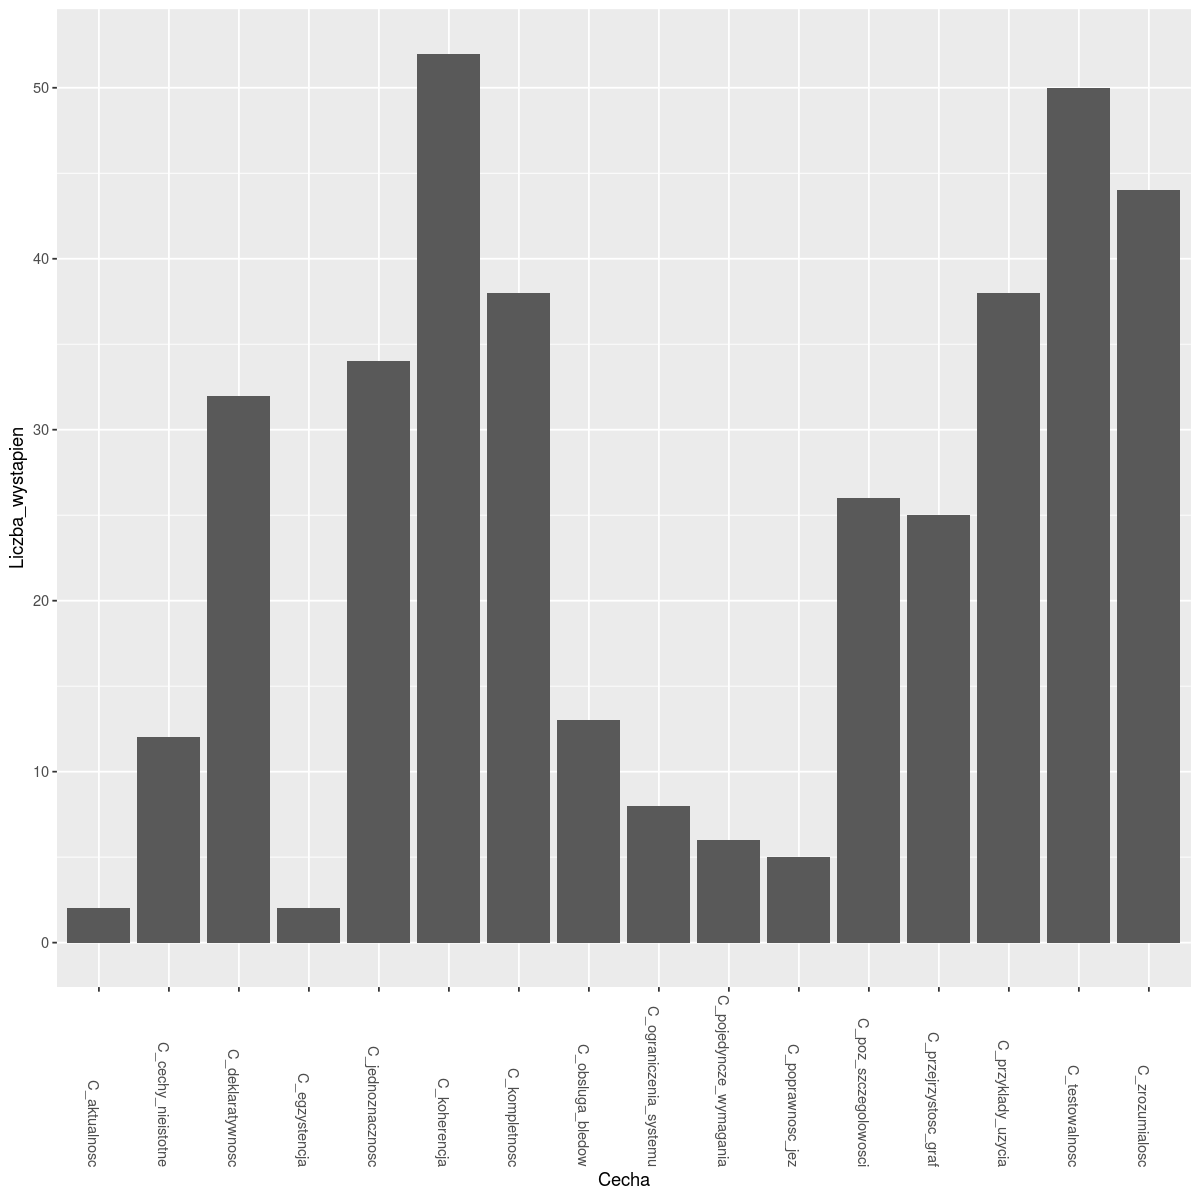

In [18]:
options(repr.plot.width=10, repr.plot.height=10)

f <- ggplot(data=fi, aes(x=Cecha, y=Liczba_wystapien))
f + geom_col() + theme(axis.text.x = element_text(angle = -90, hjust = 1)) 

# jeśli chcę z kolorami to geom_col(aes(fill=Cecha)) i wtedy jest dodatkowa legenda

In [19]:
nrow(df)/2

[1] 36.5

In [20]:
#--------------
# Analiza na piechotę

# sposób A
# sposób B
# l <- filter(select(df, C_aktualnosc:C_zrozumialosc), df$C_koherencja)
# lapply(l, sum)


#robiłam benchmark i wyszło, że szybciej liczy się dla sposobu A!!!

#-----------------------

#Tu chciałam popatrzeć na te wiersze, które spełniają dane warunki, fajne wykorzystanie one_of()

# df %>%
# filter(df$C_koherencja + df$C_testowalnosc + C_zrozumialosc + df$C_kompletnosc + df$C_przyklady_uzycia + df$C_jednoznacznosc > 3) %>%
# select(one_of('C_koherencja', 'C_testowalnosc', 'C_zrozumialosc', 'C_kompletnosc', 'C_przyklady_uzycia', 'C_jednoznacznosc'))

#Tutaj bardziej systematyczne podejście, które dla każdej kombinacji sprawdza liczbę wystąpień

# install.packages('gtools')
library(gtools)

x <- c('C_koherencja', 'C_testowalnosc', 'C_zrozumialosc', 'C_kompletnosc', 'C_przyklady_uzycia', 'C_jednoznacznosc')
p2 <- combinations(n=6,r=2,v=x)
p3 <- combinations(n=6,r=3,v=x)


comb <- data.frame(Kombinacja = character(0),
                   Liczba_wystapien = numeric(0),
                   stringsAsFactors=FALSE)


#TODO 
# można by zrobic comb2 dla dwoch cech, comb3 dla trzech, i polaczenie tych dwoch - comb2_3

for (row in 1:nrow(p2)) {
    num <- nrow(filter(df, df[p2[row,1]], df[p2[row,2]]))
    comb[row, 1] <- paste(p2[row,1], p2[row,2], sep="+")
    comb[row, 2] <- num
}

for (row in 1:nrow(p3)){
    num <- nrow(filter(df, df[p3[row,1]], df[p3[row,2]], df[p3[row,3]]))
    comb[row+nrow(p2), 1] <- paste(p3[row,1], p3[row,2], p3[row,3], sep="+")
    comb[row+nrow(p2), 2] <- num
}


comb

Kombinacja,Liczba_wystapien
C_jednoznacznosc+C_koherencja,25
C_jednoznacznosc+C_kompletnosc,12
C_jednoznacznosc+C_przyklady_uzycia,21
C_jednoznacznosc+C_testowalnosc,25
C_jednoznacznosc+C_zrozumialosc,22
C_koherencja+C_kompletnosc,26
C_koherencja+C_przyklady_uzycia,31
C_koherencja+C_testowalnosc,37
C_koherencja+C_zrozumialosc,30
C_kompletnosc+C_przyklady_uzycia,21


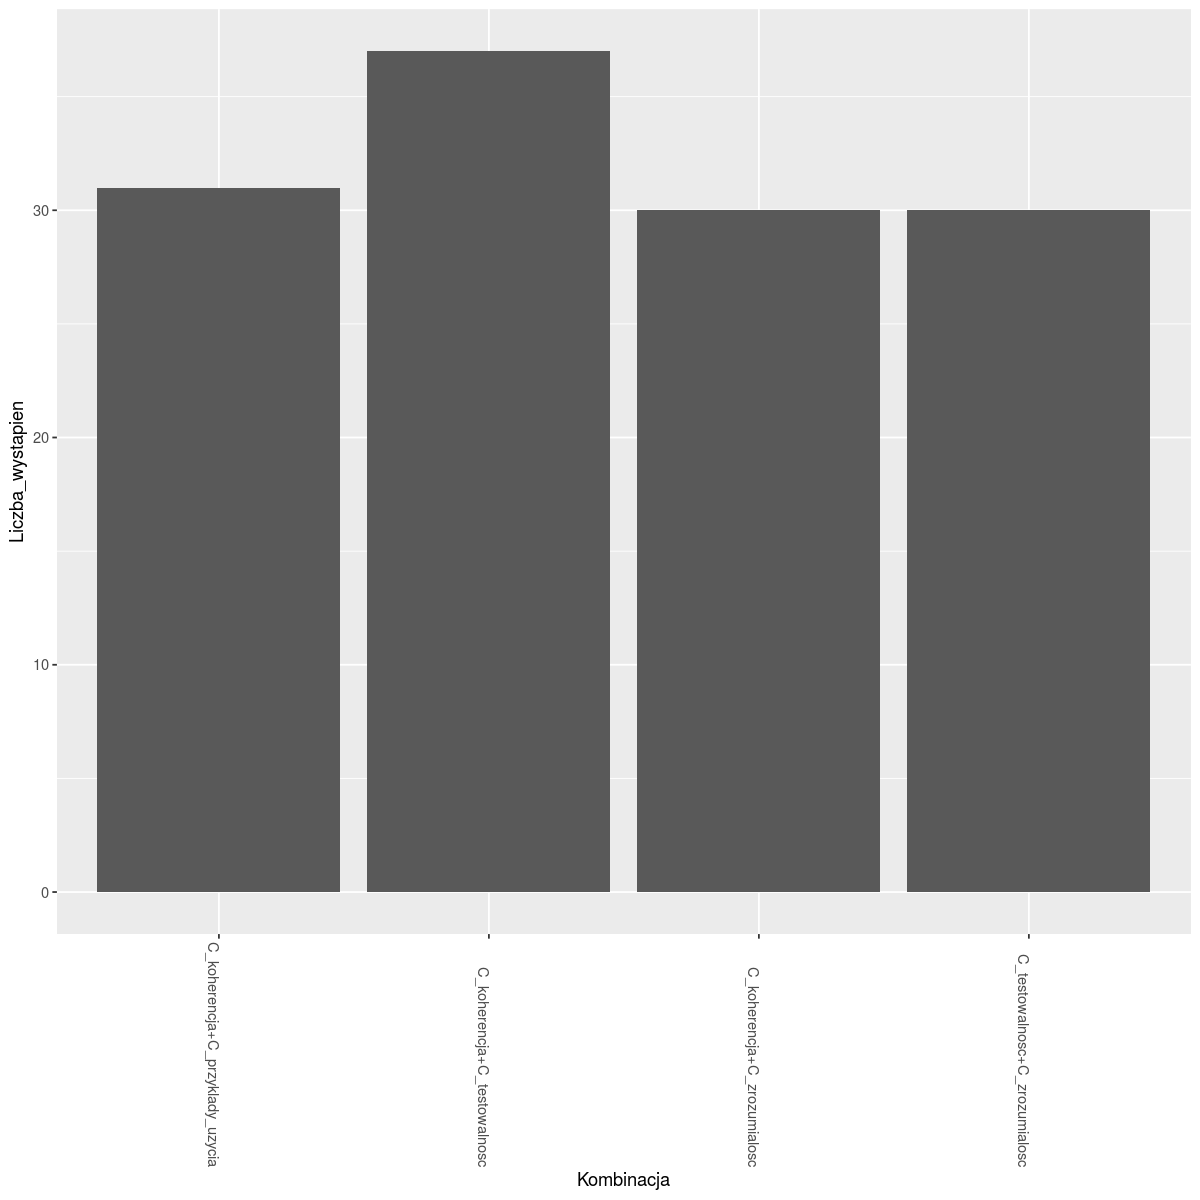

In [21]:
l_wystapien <- 28
mod_comb <- filter(comb, Liczba_wystapien>l_wystapien)

f <- ggplot(data=mod_comb, aes(x=Kombinacja, y=Liczba_wystapien))
f + geom_col() + theme(axis.text.x = element_text(angle = -90, hjust = 1)) 


Zdecydowana większość testerów wybrała koherencję, testowalność, zrozumiałość, kompletność i stosowanie przykładów użycia jako istotne cechy specyfikacji. Niektóre kombinacje cech były wybierane częściej niż inne. I tak ponad połowa respondentów za istotne uznało zarówno koherencję jak i testowalność. Natomiast wśród kombinacji trzech cech najczęściej (22 razy) pojawiły się koherencja, testowalność i przykłady użycia.

In [22]:
# write_delim(df, "df-cechy.csv", delim="|")

### Statystyka opisowa

#### Pomocnicze funkcje

In [23]:
pretty_col_name <- function(col_name){
    title <- strsplit(col_name, "_")[[1]]

    if (tail(title,1) != "norm"){
        title <- paste(title, collapse = " ")
    } else {
        title <- paste(head(title,length(title)-1), collapse = " ")
    }
    return(title)
}

In [24]:
freq_table <- function(col) {
    x<-df %>% 
        count(df[[col]]) %>%
        mutate(Procent=n/nrow(df)*100) %>%
        mutate(Suma=cumsum(Procent))
    colnames(x)[colnames(x) == "df[[col]]"] <- pretty_col_name(col)
    return(x)
}
#TODO dla dlugosci jest to bez sensu, 
# lista_kolumn <- c('Dl_projektu', 'Udzial_testerow_norm')

# for (el in lista_kolumn){
# #     print(f(el))
#     freq_table(el)
# }

# freq_table('Udzial_testerow_norm')
# colnames(df)

In [25]:
# Wielkość wykresów
options(repr.plot.width=10, repr.plot.height=6)

freq_plot <- function(col_name) {
    x_title <- pretty_col_name(col_name)
    g <- ggplot(df, aes(df[[col_name]])) + geom_bar() + theme(axis.text.x = element_text(angle = -90)) 
    g + scale_x_discrete(x_title)
} 

#### Metodyka

Metodyka,n,Procent,Suma
Iteracyjne i sekwencyjne,13,17.808219,17.80822
Iteracyjne,51,69.863014,87.67123
Sekwencyjne,7,9.589041,97.26027
Inne,2,2.739726,100.00000


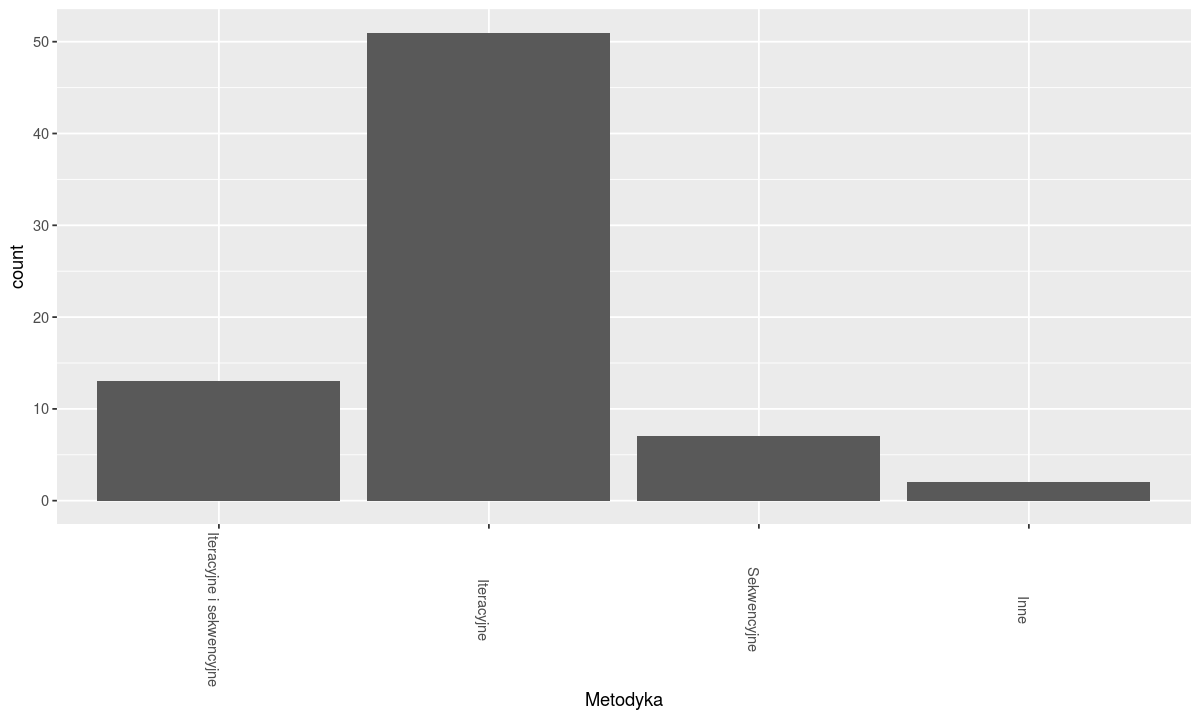

In [26]:
freq_table("Metodyka_norm")
freq_plot("Metodyka_norm")

#### Długość projektu

Dl projektu,n,Procent,Suma
do pół roku,13,17.80822,17.80822
"0,5 - 1 roku",18,24.65753,42.46575
1-3 lata,26,35.61644,78.08219
powyżej 3 lat,16,21.91781,100.00000


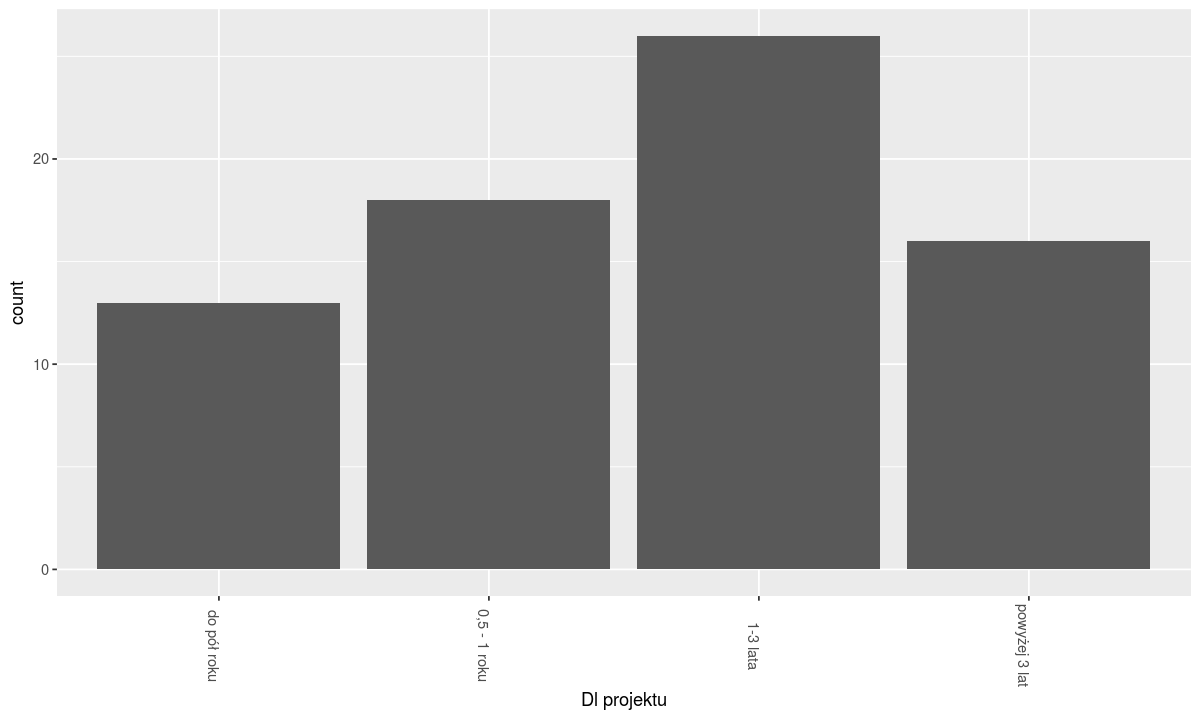

In [27]:
freq_table("Dl_projektu")
freq_plot("Dl_projektu")

#### Udział testerów

Udzial testerow,n,Procent,Suma
pełny,9,12.328767,12.32877
recenzja,24,32.876712,45.20548
wgląd przed testami,12,16.438356,61.64384
wgląd w czasie testów,14,19.178082,80.82192
brak dostępu,3,4.109589,84.93151
brak specyfikacji,8,10.958904,95.89041
inne,3,4.109589,100.00000


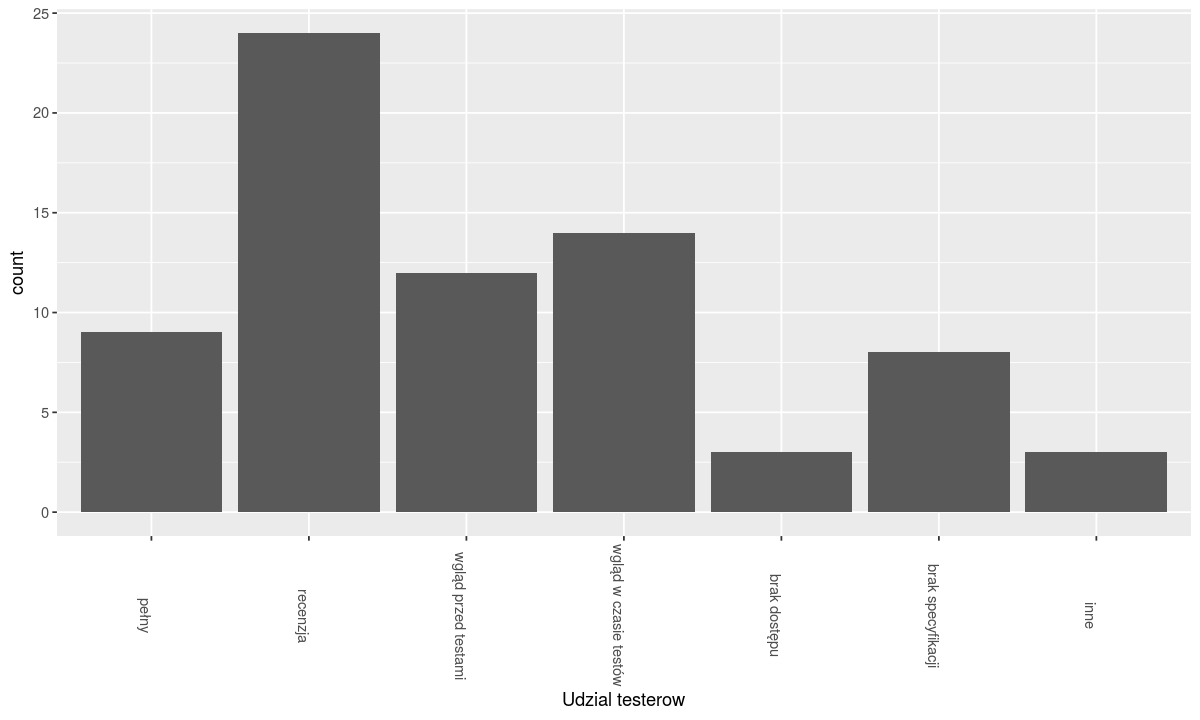

In [28]:
freq_table("Udzial_testerow_norm")
freq_plot("Udzial_testerow_norm")

#### Spisywanie wymagań

Spisanie wymagan,n,Procent,Suma
na początku,10,13.698630,13.69863
w trakcie,21,28.767123,42.46575
"na początku, ale się zmieniały",26,35.616438,78.08219
częściowo,10,13.698630,91.78082
niespisane,3,4.109589,95.89041
inne,3,4.109589,100.00000


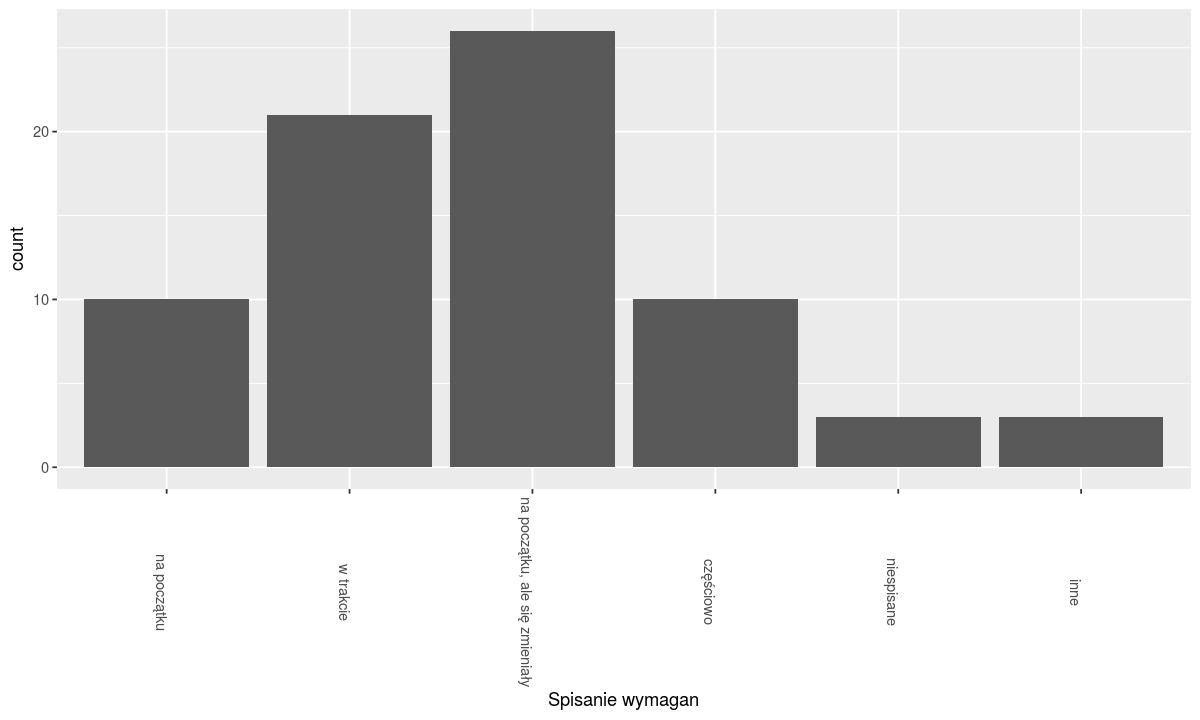

In [29]:
freq_table("Spisanie_wymagan_norm")
freq_plot("Spisanie_wymagan_norm")

#### Osoba odpowiedzialna za utrzymanie aktualnej specyfikacji

Os odpowiedzialna,n,Procent,Suma
biznes,30,41.095890,41.09589
programista,6,8.219178,49.31507
tester,5,6.849315,56.16438
zespół,7,9.589041,65.75342
nikt,15,20.547945,86.30137
biznes i programista,2,2.739726,89.04110
inne,8,10.958904,100.00000


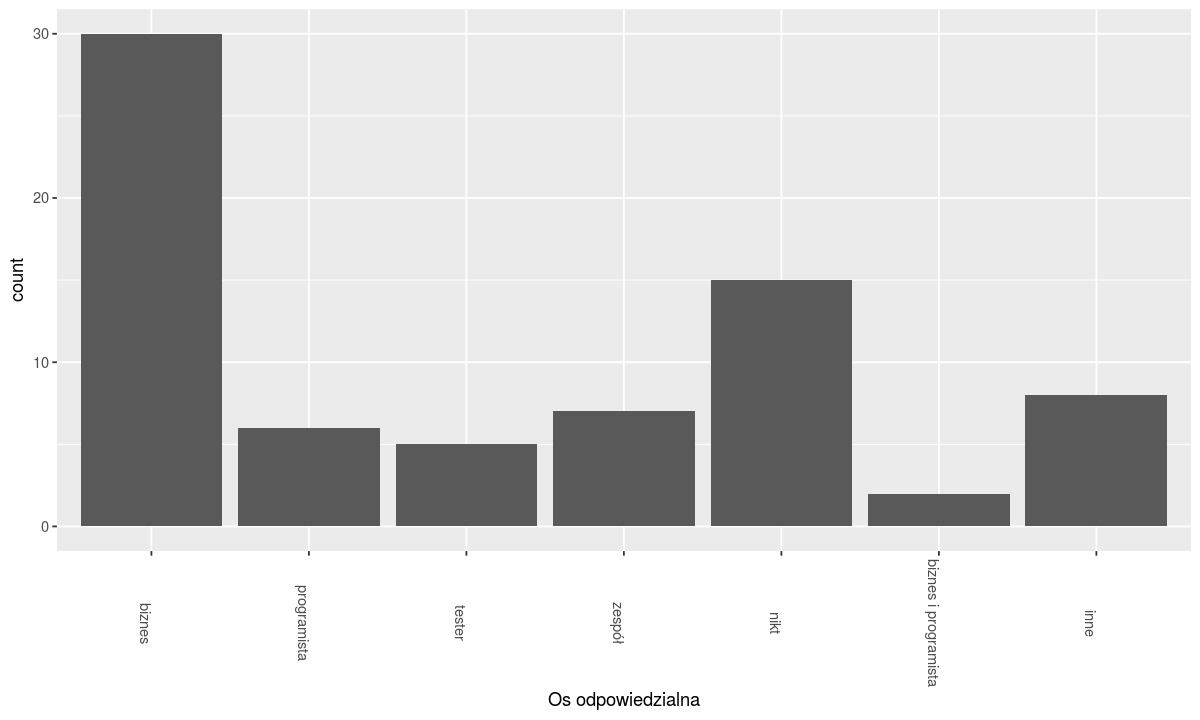

In [30]:
freq_table("Os_odpowiedzialna_norm")
freq_plot("Os_odpowiedzialna_norm")

#### Długość specyfikacji

L stron,n,Procent,Suma
do pół strony,5,6.849315,6.849315
do 1 strony,7,9.589041,16.438356
do 10 stron,9,12.328767,28.767123
powyżej 10 stron,34,46.575342,75.342466
trudno ocenić (np. jira),8,10.958904,86.301370
brak dostępu,1,1.369863,87.671233
brak specyfikacji,7,9.589041,97.260274
inne,2,2.739726,100.000000


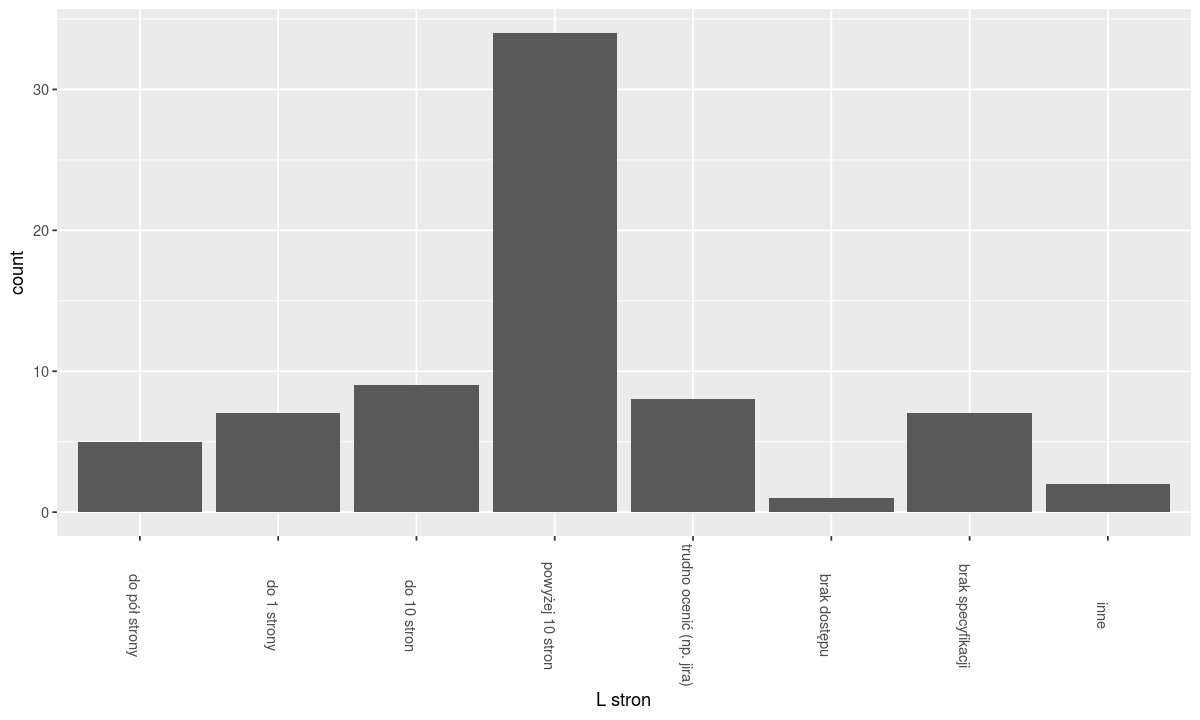

In [31]:
freq_table("L_stron_norm")
freq_plot("L_stron_norm")

#### Ważność specyfikacji

Waznosc spec,n,Procent,Suma
niezbędna,33,45.205479,45.20548
"potrzebna, ale nieaktualna",20,27.397260,72.60274
"problematyczna, bo złej jakości",7,9.589041,82.19178
brak specyfikacji,7,9.589041,91.78082
inne,6,8.219178,100.00000


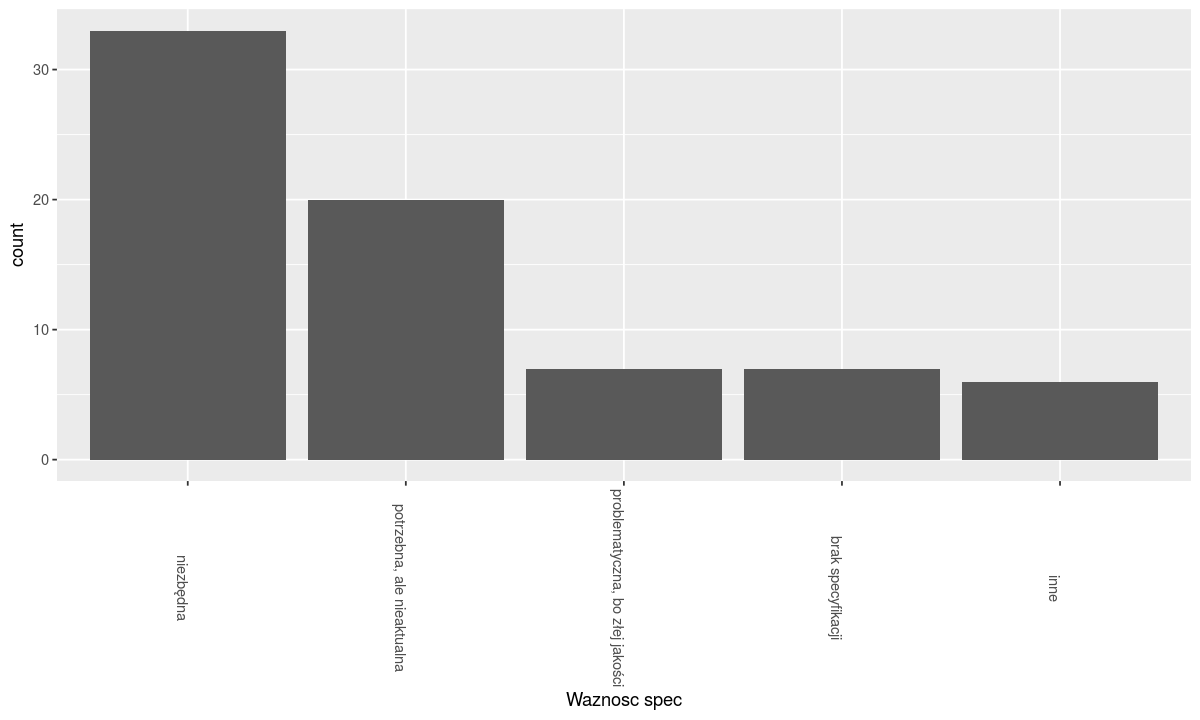

In [32]:
freq_table("Waznosc_spec_norm")
freq_plot("Waznosc_spec_norm")

In [33]:
# Ważny kod, ale na marginesie


# library(rbenchmark)

# benchmark(
#          "select"={
#     l <- filter(select(df, C_aktualnosc:C_zrozumialosc), df$C_koherencja, df$C_testowalnosc, df$C_zrozumialosc)         
#     lapply(l, sum)
#          },
#     "df"={
#     nrow(filter(df, df$C_koherencja, df$C_testowalnosc, df$C_zrozumialosc))
#     },
#     replications = 1000,
#     columns = c("test", "replications", "elapsed", "relative", "user.self", "sys.self")     
#          )


In [34]:
# head(df)

## Zmienne i relacje między zmiennymi

#### Pomocnicze funkcje

In [67]:
comb_freq_table <- function(col1, col2) {
    table <- summarise(group_by(df, df[[col1]], df[[col2]]), Liczba_wystapien=n())
    colnames(table)[colnames(table) == "df[[col1]]"] <- pretty_col_name(col1)
    colnames(table)[colnames(table) == "df[[col2]]"] <- pretty_col_name(col2)
    return(table)
}

comb_freq_plot <- function(subdf, col1, col2){    
    pretty_col2 <- subdf[[pretty_col_name(col2)]]
    pretty_col1 <- subdf[[pretty_col_name(col1)]]
    f <- ggplot(data=subdf, aes(x=pretty_col2, y=Liczba_wystapien, group=pretty_col1, color=pretty_col1))
    g <- f + geom_point() + geom_line() 
    g + scale_x_discrete(pretty_col_name(col2)) + scale_color_discrete(pretty_col_name(col1))
}

## Metodyka a czas trwania projektu

Metodyka,Dl projektu,Liczba_wystapien
Iteracyjne i sekwencyjne,do pół roku,2
Iteracyjne i sekwencyjne,"0,5 - 1 roku",2
Iteracyjne i sekwencyjne,1-3 lata,5
Iteracyjne i sekwencyjne,powyżej 3 lat,4
Iteracyjne,do pół roku,9
Iteracyjne,"0,5 - 1 roku",13
Iteracyjne,1-3 lata,18
Iteracyjne,powyżej 3 lat,11
Sekwencyjne,do pół roku,1
Sekwencyjne,"0,5 - 1 roku",3


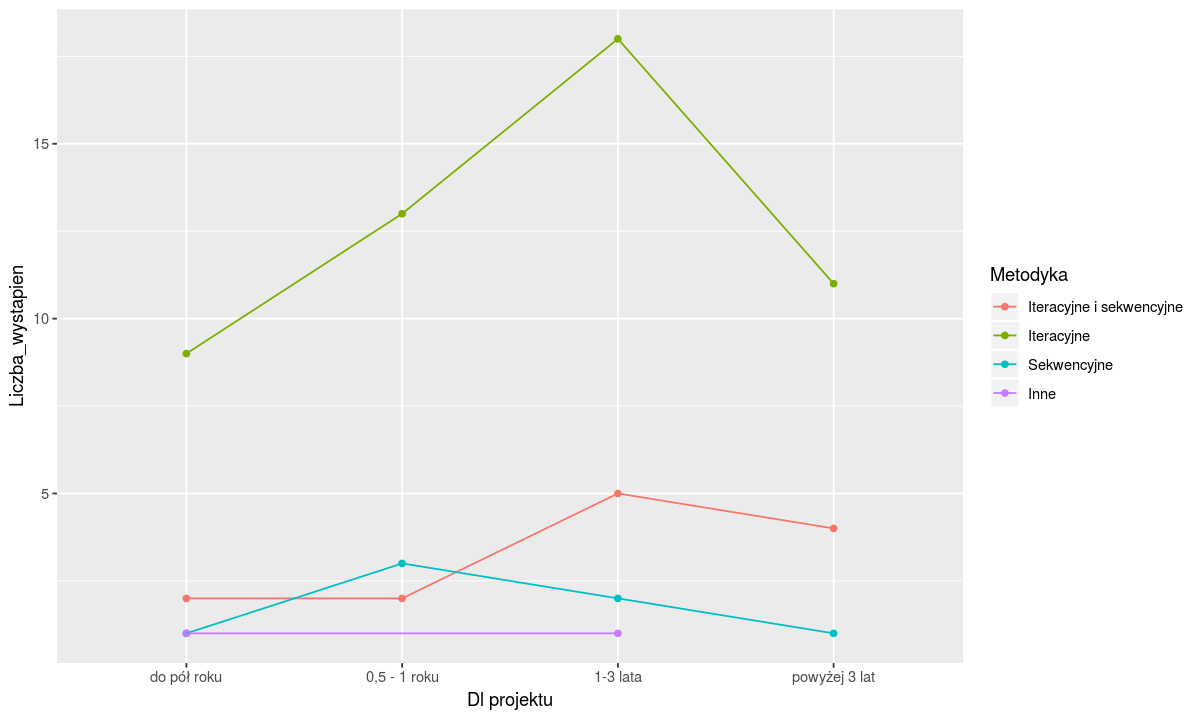

In [68]:
method_length_comb_table <- comb_freq_table("Metodyka_norm", "Dl_projektu")
method_length_comb_table
comb_freq_plot(method_length_comb_table, "Metodyka_norm", "Dl_projektu")

Respondenci najczęściej uczestniczyli w projektach trwających 1-3 lat, a w krótkich projektach (trwających do pół roku) uczestniczyli najrzadziej. Jest zbyt mało danych, by stwierdzić, czy rodzaj stosowanej metodyki ma wpływ na tę zależność. 

### Metodyka a udział testerów w projekcie

In [36]:
# colnames(df)
# unique(df$Udzial_testerow)

# df <- df %>%
#     mutate(Udzial_testerow_num = case_when(
#         Udzial_testerow == "pełny"  ~ 1,
#         Udzial_testerow == "recenzja" ~ 2,
#         Udzial_testerow == "wgląd przed testami" ~ 3,
#         Udzial_testerow == "wgląd w czasie testów" ~ 4,
#         Udzial_testerow == "brak dostępu" ~ 5,
#         Udzial_testerow == "brak specyfikacji" ~ 6,
#         Udzial_testerow == paste("Coś między dwa a trzy - nie tyle do recenzji, ",
#         "ile był dostęp dość szybko i uwagi, które się nasunęły w czasie projektowania strategii ",
#         "i planów były brane pod uwagę.", sep="") ~ 2,
#         Udzial_testerow == "gdy się zainteresowali, to mogli na cośwplynąć" ~ 2,
#         Udzial_testerow == paste("specyfikacja częściowo dostępna na początku, zmienna ",
#                                  "i głównie rozszerzana w trakcie trwania projektu", sep="") ~ 3,
#         Udzial_testerow == paste("wgląd od początku, ale bez wpływu na zmiany; ",
#                                  "natomiast klient zmiany wprowadzał cały czas, także już po oddaniu projektu!! ", sep="") ~ 3,
#         Udzial_testerow == paste("nie brali udziału w fazie projektowania wymagań, ",  
#         "ale mieli pełny dostęp do specyfikacji w czasie testów", sep="") ~ 4,
#         TRUE ~ 7
#     ))



# df %>% select(Udzial_testerow, Udzial_testerow_norm) %>% filter(Udzial_testerow_norm=="inne")

# df %>% 
#     count(Udzial_testerow_num) %>%
# #     arrange(desc(-Udzial_testerow_num)) %>% #to w ogóle nie jest potrzebne!
#     mutate(Procent=n/nrow(df)*100) %>%
#     mutate(Suma=cumsum(Procent))

# by_x <- group_by(df, Udzial_testerow, Udzial_testerow_num)
# arrange(summarise(by_x, n = n()), desc(-Udzial_testerow_num))

Prawie połowa (około 45%) ankietowanych ma możliwość wnoszenia uwag do specyfikacji jeszcze przed rozpoczęciem prac deweloperskich. Około 1/3 ankietowanych może to robić na etapie recenzji gotowej specyfikacji, a tylko trochę ponad 12% ankietowanych ma możliwość aktywnie uczestniczyć w procesie tworzenia specyfikacji. Ogółem około 60% respondentów miało dostęp do specyfikacji przed rozpoczęciem testów, około 20%  w czasie trwającego procesu, a 15% ankietowanych testerów w ogóle nie miało dostępu do specyfikacji!

In [37]:
subtable <- summarise(group_by(df, Rodzaj_metodyki, Udzial_testerow_num), Liczba_wystapien=n())

f <- ggplot(data=subtable, aes(x=Udzial_testerow_num, y=Liczba_wystapien, color=Rodzaj_metodyki))
g <- f + geom_point() + geom_line() 
class(df$Udzial_testerow)
# g + scale_x_continuous("Czas trwania projektu", labels=c("do pół roku", "0,5 - 1 roku", "1-3 lata", "powyżej 3 lat")) 
# TODO  3 - label dla osi y i legendy
g

ERROR: Error: Column `Rodzaj_metodyki` is unknown


### Czas trwania projektu a istotne cechy 
ale to nie do konca to, bo istotne cechy sa podsumowaniem pracy testera, a czas trwania dottyczy danego projektu

In [ ]:
by_long <- group_by(df, Dl_projektu)
a <- summarise(by_long, n = n(), Liczba_c_zrozumialosc = sum(C_zrozumialosc))
a

In [ ]:
nrow(df)/2

## Uwagi do ankiety i pomysły na przyszłość

1.  Słabym pomysłem było proszenie ankietowanych o odpowiedzi w oparciu o 3 ostatnie projekty (wiele informacji jest pomieszanych i nie można ich przeanalizować).
2. Warto by było sprawdzić, które cechy specyfikacji najczęściej są spotykane w rzeczywistych projektach a które najrzadziej (np. przez stopniowanie). W ten sposób można by było porównać oczekiwania z realiami. :) 